In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

# Visualize Data

In [148]:
df = pd.read_csv('real_estate.csv')
df = df[['X2 house age','X3 distance to the nearest MRT station','Y house price of unit area']]
df = df.rename(columns={"X2 house age": "X1", "X3 distance to the nearest MRT station": "X2", "Y house price of unit area": "Y"}, errors="raise")
df.head()

,X1,X2,Y
0,32.0,84.87882,37.9
1,19.5,306.59470,42.2
2,13.3,561.98450,47.3
3,13.3,561.98450,54.8
4,5.0,390.56840,43.1


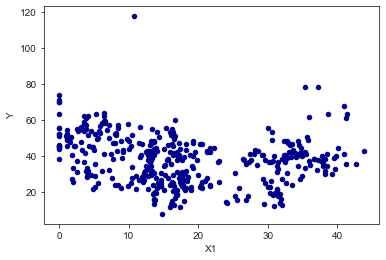

In [149]:
ax1 = df.plot.scatter(x='X1',y='Y',c='DarkBlue')

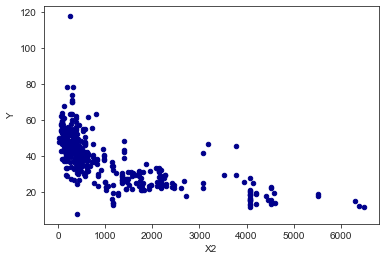

In [150]:
ax1 = df.plot.scatter(x='X2',y='Y',c='DarkBlue')

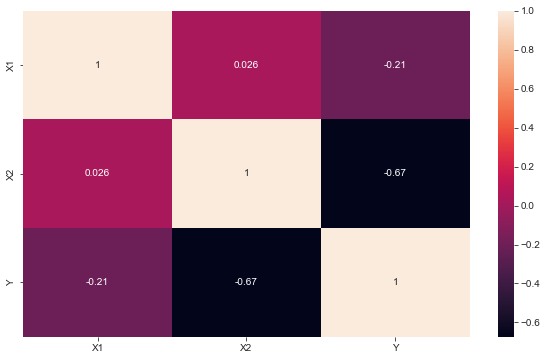

In [151]:
# Let's plot the correlation of the data set using a heatmap from seaborn library
corr_data = df.corr()

plt.figure(figsize=(10, 6))
sns.set_style('ticks')

sns.heatmap(corr_data, annot=True)

plt.show()

# Calculate X1^2, X2^2, X1X2, X1Y, X2Y

In [152]:
df['X1^2'] = df['X1']*df['X1']
df['X2^2'] = df['X2']*df['X2']
df['X1X2'] = df['X1']*df['X2']
df['X1Y'] = df['X1']*df['Y']
df['X2Y'] = df['X2']*df['Y']
df.head()

,X1,X2,Y,X1^2,X2^2,X1X2,X1Y,X2Y
0,32.0,84.87882,37.9,1024.00,7204.414085,2716.12224,1212.80,3216.907278
1,19.5,306.59470,42.2,380.25,94000.310068,5978.59665,822.90,12938.296340
2,13.3,561.98450,47.3,176.89,315826.578240,7474.39385,629.09,26581.866850
3,13.3,561.98450,54.8,176.89,315826.578240,7474.39385,728.84,30796.750600
4,5.0,390.56840,43.1,25.00,152543.675079,1952.84200,215.50,16833.498040


# Regression sum calculations

In [184]:
n = len(df)
x12_sum = df['X1^2'].sum() - ((df['X1'].sum()**2) / n)
x22_sum = df['X2^2'].sum() - ((df['X2'].sum())**2 / n)
x1y_sum = df['X1Y'].sum() - (df['X1'].sum()*df['Y'].sum() / n)
x2y_sum = df['X2Y'].sum() - ((df['X2'].sum()*df['Y'].sum()) / n)
x1x2_sum = df['X1X2'].sum() - ((df['X2'].sum()*df['X1'].sum()) / n)

# Calculate b0, b1, b2

In [199]:
b1 = ((x22_sum*x1y_sum)-(x1x2_sum*x2y_sum)) / ((x12_sum*x22_sum)-((x1x2_sum)**2))
b2 = ((x12_sum*x2y_sum)-(x1x2_sum*x1y_sum)) / ((x12_sum*x22_sum)-((x1x2_sum)**2))
b0 = 0
for i in range(len(df)):
    intercept = df['Y'][i] - b1*(df['X1'][i]) - b2*(df['X2'][i])
    b0 += intercept
b0 = b0/n

# Create prediction function

In [200]:
def predict(x1,x2):
    return b0+(b1*x1)+(b2*x2)
predict(5,390)

45.91909098384444

# Compare results with sklearn

In [201]:
x = df[['X1','X2']]
y = df['Y']

reg = linear_model.LinearRegression()
reg.fit(x,y)
print('calculated intercept: \n',b0)
print('calculated coefficients \n',b1,' ',b2)
print('sklearn intercept: \n', reg.intercept_)
print('sklearn coefficients: \n', reg.coef_)

calculated intercept: 
 49.88558575690663
calculated coefficients 
 -0.23102658345724725   -0.007208620143015248
sklearn intercept: 
 49.885585756906636
sklearn coefficients: 
 [-0.23102658 -0.00720862]
